In [1]:
import cv2
import matplotlib.pyplot as plt

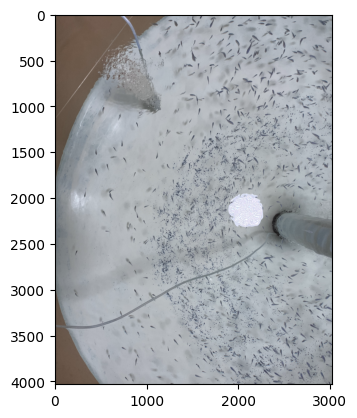

In [2]:
img_rgb = cv2.imread('sardi-rgb-comparison.jpg')
plt.imshow(img_rgb)

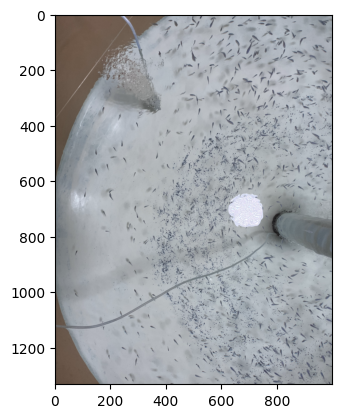

In [3]:
r = 1000.0 / img_rgb.shape[1]
dim = (1000, int(img_rgb.shape[0] * r))
# perform the actual resizing of the image
resized = cv2.resize(img_rgb, dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized)

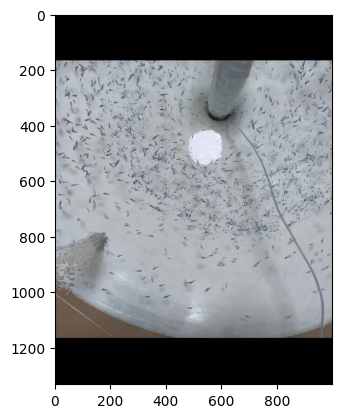

In [4]:
(h, w) = resized.shape[:2]
(cX, cY) = (w // 2, h // 2)

# rotate our image by -90 degrees around the image
M = cv2.getRotationMatrix2D((cX, cY), 90, 1.0)
rotated = cv2.warpAffine(resized, M, (w, h))
plt.imshow(rotated)

ValueError: zero-size array to reduction operation minimum which has no identity

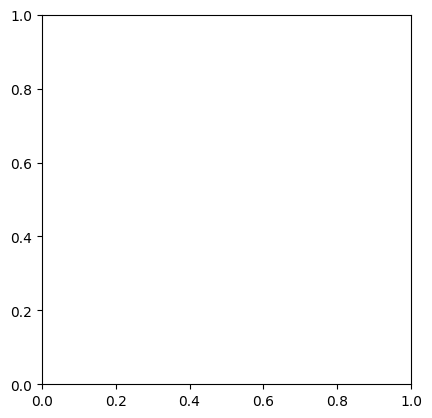

In [6]:
# Select ROI
r = cv2.selectROI("select roi", rotated)

# close the window
cv2.destroyAllWindows()

# Crop hsi image
cropped = rotated[int(r[1]):int(r[1]+r[3]),int(r[0]):int(r[0]+r[2]),:]

plt.imshow(cropped)

In [ ]:
cv2.imwrite('right-pipe-rgb.jpg', cropped)